In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 16})

In [2]:
fApril='/ocean/eolson/MEOPAR/obs/FRSampling/psd/EOS-Roger-FraserPlume-A2-C2-Counts.csv'
fMay='/ocean/eolson/MEOPAR/obs/FRSampling/psd/Roger-FraserPlume-M2-I2-Counts.csv'

In [3]:
# microns and #/ml
A=pd.read_csv(fApril,header=0,names=('diam','num'),usecols=[0,1],nrows=284)
A.tail(5)

,diam,num
279,26.24,0
280,26.50,0
281,26.77,0
282,27.04,2
283,27.31,0


In [4]:
C=pd.read_csv(fApril,header=0,names=('diam','num'),usecols=[2,3])
C.tail(5)

,diam,num
290,29.29,0
291,29.58,0
292,29.87,0
293,30.17,3
294,30.47,0


In [5]:
M=pd.read_csv(fMay,header=0,names=('diam','num'),usecols=[0,1],nrows=283)

In [6]:
M.tail(5)

,diam,num
278,26.04,0
279,26.30,0
280,26.56,0
281,26.82,3
282,27.08,0


In [7]:
I=pd.read_csv(fMay,header=0,names=('diam','num'),usecols=[2,3])
I.tail(5)

,diam,num
295,30.77,13
296,31.07,0
297,31.38,0
298,31.69,0
299,32.00,13


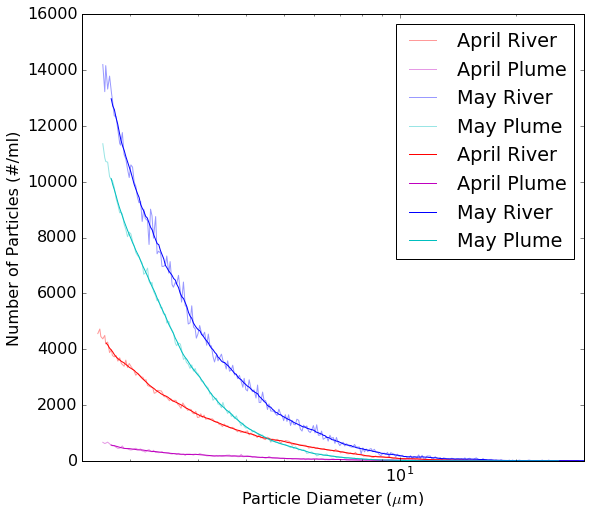

In [45]:
fig,ax=plt.subplots(1,1,figsize=(9,8))
ax.plot(A.diam,A.num,'r-',alpha=.4, label='April River')
ax.plot(C.diam,C.num,'m-',alpha=.4, label='April Plume')
ax.plot(I.diam,I.num,'b-',alpha=.4, label='May River')
ax.plot(M.diam,M.num,'c-',alpha=.4, label='May Plume')
# With moving average filter
wind=np.ones(11)/11
AfiltN=np.convolve(A.num,wind,mode='valid')
AfiltD=np.convolve(A.diam,wind,mode='valid')
CfiltN=np.convolve(C.num,wind,mode='valid')
CfiltD=np.convolve(C.diam,wind,mode='valid')
MfiltN=np.convolve(M.num,wind,mode='valid')
MfiltD=np.convolve(M.diam,wind,mode='valid')
IfiltN=np.convolve(I.num,wind,mode='valid')
IfiltD=np.convolve(I.diam,wind,mode='valid')
ax.plot(AfiltD,AfiltN,'r-',alpha=1, label='April River')
ax.plot(CfiltD,CfiltN,'m-',alpha=1, label='April Plume')
ax.plot(IfiltD,IfiltN,'b-',alpha=1, label='May River')
ax.plot(MfiltD,MfiltN,'c-',alpha=1, label='May Plume')
ax.set_xscale('log')
ax.set_xlim(1.5,30)
ax.legend()
ax.set_xlabel('Particle Diameter ($\mu$m)')
ax.set_ylabel('Number of Particles (#/ml)')

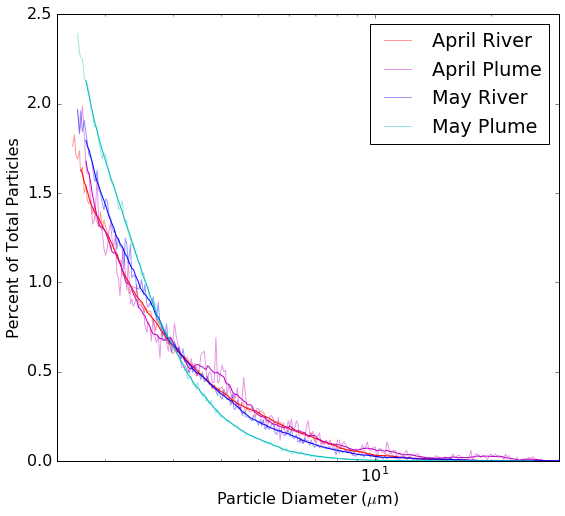

In [47]:
fig,ax=plt.subplots(1,1,figsize=(9,8))
ax.plot(A.diam,A.num/np.sum(A.num)*100,'r-',alpha=.4,)
ax.plot(C.diam,C.num/np.sum(C.num)*100,'m-',alpha=.4)
ax.plot(I.diam,I.num/np.sum(I.num)*100,'b-',alpha=.4)
ax.plot(M.diam,M.num/np.sum(M.num)*100,'c-',alpha=.4)
# With moving average filter
wind=np.ones(11)/11
AfiltN=np.convolve(A.num/np.sum(A.num)*100,wind,mode='valid')
AfiltD=np.convolve(A.diam,wind,mode='valid')
CfiltN=np.convolve(C.num/np.sum(C.num)*100,wind,mode='valid')
MfiltD=np.convolve(M.diam,wind,mode='valid')
IfiltN=np.convolve(I.num/np.sum(I.num)*100,wind,mode='valid')
CfiltD=np.convolve(C.diam,wind,mode='valid')
MfiltN=np.convolve(M.num/np.sum(M.num)*100,wind,mode='valid')
IfiltD=np.convolve(I.diam,wind,mode='valid')
p1,=ax.plot(AfiltD,AfiltN,'r-',label='April River')
p2,=ax.plot(CfiltD,CfiltN,'m-', label='April Plume')
p3,=ax.plot(IfiltD,IfiltN,'b-', label='May River')
p4,=ax.plot(MfiltD,MfiltN,'c-', label='May Plume')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(1.5,30)
ax.legend((p1.get_label(),p2.get_label(),p3.get_label(),p4.get_label()))
ax.set_xlabel('Particle Diameter ($\mu$m)')
ax.set_ylabel('Percent of Total Particles')

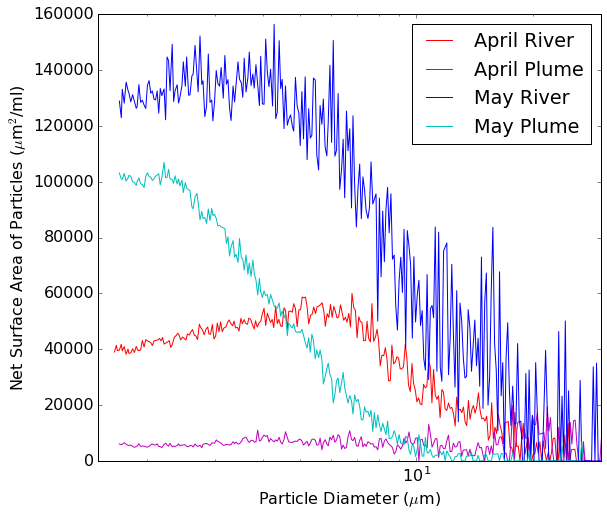

In [15]:
fig,ax=plt.subplots(1,1,figsize=(9,8))
ax.plot(A.diam,A.num*4*np.pi*(A.diam/2)**2,'r-',label='April River')
ax.plot(C.diam,C.num*4*np.pi*(C.diam/2)**2,'m-', label='April Plume')
ax.plot(I.diam,I.num*4*np.pi*(I.diam/2)**2,'b-', label='May River')
ax.plot(M.diam,M.num*4*np.pi*(M.diam/2)**2,'c-',label='May Plume')
ax.set_xscale('log')
ax.set_xlim(1.5,30)
ax.legend()
ax.set_xlabel('Particle Diameter ($\mu$m)')
ax.set_ylabel('Net Surface Area of Particles ($\mu$m$^2$/ml)')

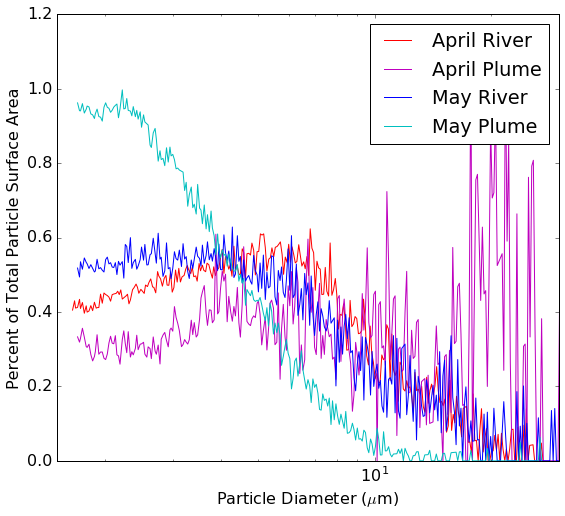

In [16]:
fig,ax=plt.subplots(1,1,figsize=(9,8))
ax.plot(A.diam,A.num*4*np.pi*(A.diam/2)**2/np.sum(A.num*4*np.pi*(A.diam/2)**2)*100,'r-',label='April River')
ax.plot(C.diam,C.num*4*np.pi*(C.diam/2)**2/np.sum(C.num*4*np.pi*(C.diam/2)**2)*100,'m-', label='April Plume')
ax.plot(I.diam,I.num*4*np.pi*(I.diam/2)**2/np.sum(I.num*4*np.pi*(I.diam/2)**2)*100,'b-', label='May River')
ax.plot(M.diam,M.num*4*np.pi*(M.diam/2)**2/np.sum(M.num*4*np.pi*(M.diam/2)**2)*100,'c-',label='May Plume')
ax.set_xscale('log')
ax.set_xlim(1.5,30)
ax.legend()
ax.set_xlabel('Particle Diameter ($\mu$m)')
ax.set_ylabel('Percent of Total Particle Surface Area')

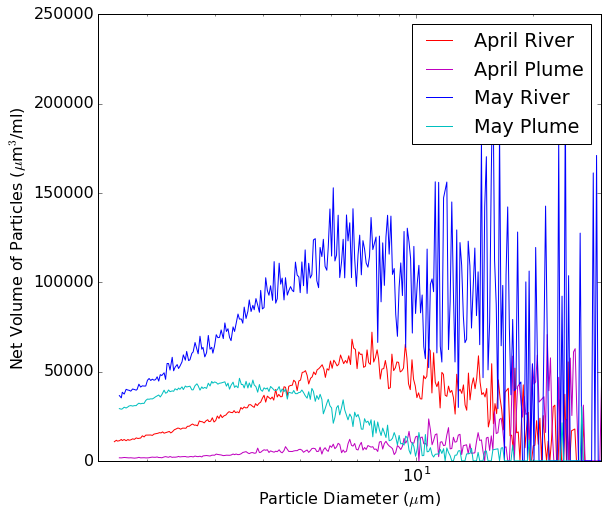

In [17]:
fig,ax=plt.subplots(1,1,figsize=(9,8))
ax.plot(A.diam,A.num*4/3*np.pi*(A.diam/2)**3,'r-',label='April River')
ax.plot(C.diam,C.num*4/3*np.pi*(C.diam/2)**3,'m-', label='April Plume')
ax.plot(I.diam,I.num*4/3*np.pi*(I.diam/2)**3,'b-', label='May River')
ax.plot(M.diam,M.num*4/3*np.pi*(M.diam/2)**3,'c-',label='May Plume')
ax.set_xscale('log')
ax.set_xlim(1.5,30)
ax.legend()
ax.set_xlabel('Particle Diameter ($\mu$m)')
ax.set_ylabel('Net Volume of Particles ($\mu$m$^3$/ml)')

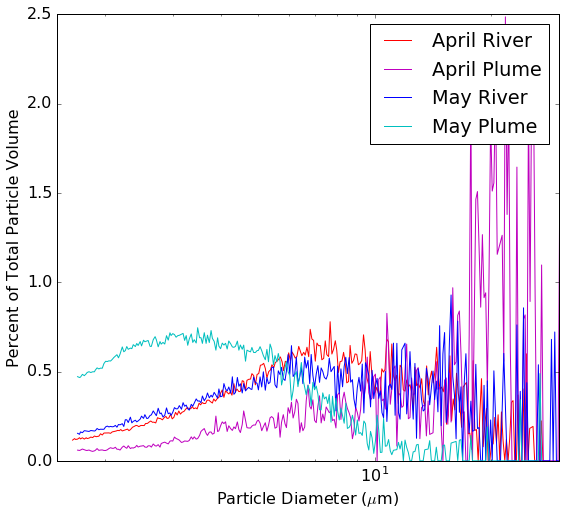

In [18]:
fig,ax=plt.subplots(1,1,figsize=(9,8))
ax.plot(A.diam,A.num*4/3*np.pi*(A.diam/2)**3/np.sum(A.num*4/3*np.pi*(A.diam/2)**3)*100,'r-',label='April River')
ax.plot(C.diam,C.num*4/3*np.pi*(C.diam/2)**3/np.sum(C.num*4/3*np.pi*(C.diam/2)**3)*100,'m-', label='April Plume')
ax.plot(I.diam,I.num*4/3*np.pi*(I.diam/2)**3/np.sum(I.num*4/3*np.pi*(I.diam/2)**3)*100,'b-', label='May River')
ax.plot(M.diam,M.num*4/3*np.pi*(M.diam/2)**3/np.sum(M.num*4/3*np.pi*(M.diam/2)**3)*100,'c-',label='May Plume')
ax.set_xscale('log')
ax.set_xlim(1.5,30)
ax.legend()
ax.set_xlabel('Particle Diameter ($\mu$m)')
ax.set_ylabel('Percent of Total Particle Volume')

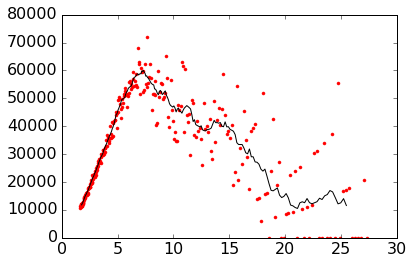

In [29]:
# With moving average filter
wind=np.ones(15)/15
AfiltN=np.convolve(A.num,wind,mode='valid')
AfiltD=np.convolve(A.diam,wind,mode='valid')
plt.plot(A.diam,A.num*4/3*np.pi*(A.diam/2)**3,'r.')
plt.plot(AfiltD,AfiltN*4/3*np.pi*(AfiltD/2)**3,'k-')

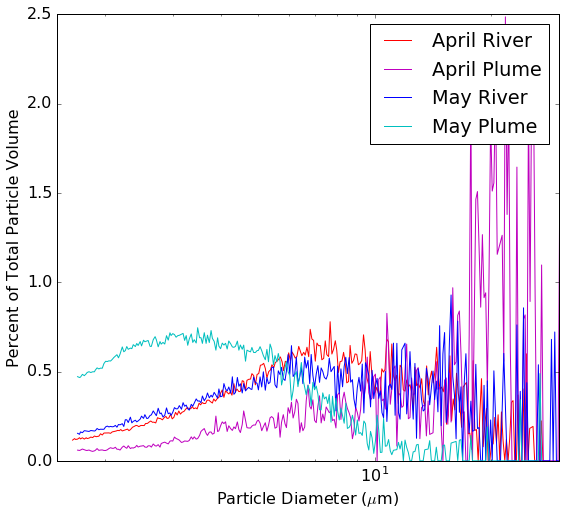

In [18]:
fig,ax=plt.subplots(1,1,figsize=(9,8))
ax.plot(A.diam,A.num*4/3*np.pi*(A.diam/2)**3/np.sum(A.num*4/3*np.pi*(A.diam/2)**3)*100,'r-',label='April River')
ax.plot(C.diam,C.num*4/3*np.pi*(C.diam/2)**3/np.sum(C.num*4/3*np.pi*(C.diam/2)**3)*100,'m-', label='April Plume')
ax.plot(I.diam,I.num*4/3*np.pi*(I.diam/2)**3/np.sum(I.num*4/3*np.pi*(I.diam/2)**3)*100,'b-', label='May River')
ax.plot(M.diam,M.num*4/3*np.pi*(M.diam/2)**3/np.sum(M.num*4/3*np.pi*(M.diam/2)**3)*100,'c-',label='May Plume')
ax.set_xscale('log')
ax.set_xlim(1.5,30)
ax.legend()
ax.set_xlabel('Particle Diameter ($\mu$m)')
ax.set_ylabel('Percent of Total Particle Volume, Smoothed')